# Praca domowa 2 cz. 2
Jakub Grunas, Maciej Pawlikowski, Bartosz Siński


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import itemfreq
from PIL import Image, ImageDraw
from os import path
import os

In [2]:
noncovid_meta=pd.read_csv("NonCovid-CT-Metainfo.csv")
covid_meta=pd.read_excel("Covid-CT-Metainfo.xlsx")
annotations=pd.read_csv("annotations_test.csv")
labels=pd.read_csv("image_labels_test.csv")

In [22]:
jsrt_nodules=pd.read_csv('./jsrt/Clinical_Information/CLNDAT_EN.txt', sep='\t', names = ['ImageID', 'Nodule_size', 'Degree_of_subtlety', 'Age','Sex','X','Y','Type','Location', 'Diagnosis'], index_col=False)
jsrt_non_nodules=pd.read_csv('./jsrt/Clinical_Information/CNNDAT_EN.txt', sep=' ', names = ['ImageID', 'Age', 'Sex', 'Type'], index_col=False)
padchest_meta = pd.read_csv('padchest_dataset/PADCHEST_chest_x_ray_images_labels_160K_01.02.19.csv')

c:\users\kuba\appdata\local\programs\python\python38-32\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
path1 = 'The IQ-OTHNCCD lung cancer dataset\\Bengin cases'
path2 = 'The IQ-OTHNCCD lung cancer dataset\\Malignant cases'
path3 = 'The IQ-OTHNCCD lung cancer dataset\\Normal cases'
paths_iq = [path1,path2,path3]
path_x= 'covid-chestxray-dataset\\images'
chestxray_df = pd.read_csv("covid-chestxray-dataset/metadata.csv")

## Picture histogram

#### Covid

In [7]:
def hist(picture_name,path):
    image=Image.open(path+picture_name)
    plt.hist(np.ravel(image))

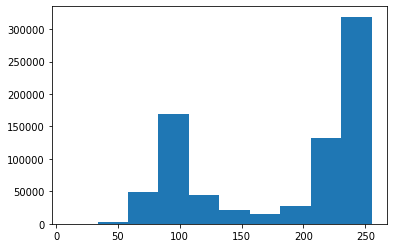

In [41]:
hist("2019-novel-Coronavirus-severe-adult-respiratory-dist_2020_International-Jour-p3-89%0.png","./Covid-CT/CT_COVID/")

#### NonCovid

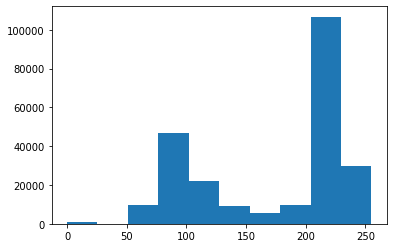

In [44]:
hist(picture_names.iloc[2],path_non_covid)

## IQ-OTH/NCCD
Bengin case


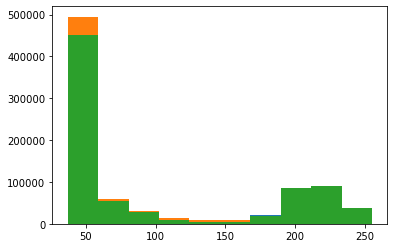

In [19]:
hist('\\Bengin case (1).jpg',paths_iq[0])

Malignant case

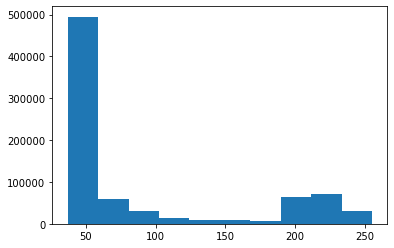

In [20]:
hist('\\Malignant case (1).jpg',paths_iq[1])

Normal case

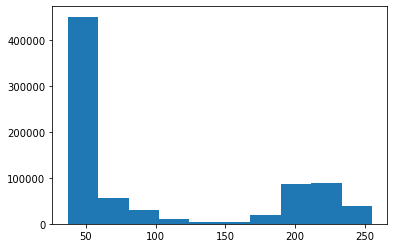

In [21]:
hist('\\Normal case (1).jpg',paths_iq[2])

In both covid and cancer cases there is no difference between histograms of the photos.

## Are there multiple pictures of the same patient? If so calculate difference between them.

In VinDr_CXR, JSRT, IQ-OTH/NCCD and Covid-19 Chest X-ray datasets there are no labels specifing patients, by id or otherwise

In [6]:

#calculate patients with more than one picture
def more_than_one_picture(patient_id):
    patients=[]
    for p in itemfreq(patient_id):
        if(p[1]>1):
            patients.append(p[0])
    return patients

In [7]:
patients=more_than_one_picture(noncovid_meta["patient id"])


<ipython-input-6-3ddd96e2bc52>:4: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  for p in itemfreq(patient_id):


In [9]:
def calculate_norms(picture_names,path):
    image_matrices=[]
    shape=Image.open(path+picture_names.iloc[0])
    shape=shape.size
    for name in picture_names:
        image=Image.open(path+name)
        image_matrices.append(np.array(image.resize(shape)))
    for i in range(len(image_matrices)-1):
        print(f'norm of matrix {i}: {np.linalg.norm(image_matrices[i])}')
        print(f'difference between {i+1} and {i} matrices: {np.linalg.norm(image_matrices[i+1]-image_matrices[i])}, percentage of norm of matrix 0: {np.linalg.norm(image_matrices[i+1]-image_matrices[i])/np.linalg.norm(image_matrices[i])}')

In [21]:
# DO NOT CREATE VARIABLE NAMED 'path' !!!!!!!!!!!!!!!!!!!!!!!!!!!

#### Covid CT

In [10]:
#Calculates Frobenius norm
path_non_covid="./Covid-CT/CT_NonCOVID/" #Specify path to picture
patient=patients[4] #Specify patient
picture_names=noncovid_meta[noncovid_meta["patient id"]==patient]["image name"]
calculate_norms(picture_names,path_non_covid)

norm of matrix 0: 88669.01445826495
difference between 1 and 0 matrices: 69414.16403732022, percentage of norm of matrix 0: 0.7828457828409983
norm of matrix 1: 86002.20135554671
difference between 2 and 1 matrices: 87190.34107629124, percentage of norm of matrix 0: 1.013815224517714
norm of matrix 2: 86204.41033381065
difference between 3 and 2 matrices: 64437.147655680725, percentage of norm of matrix 0: 0.7474924705842749


#### Padchest

In [18]:
patients_padchest = more_than_one_picture(padchest_meta[padchest_meta['ImageDir']==40]['PatientID'])

<ipython-input-6-3ddd96e2bc52>:4: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  for p in itemfreq(patient_id):


In [20]:
path_padchest="./padchest_dataset/images/" #Specify path to picture
patient=patients_padchest[4] #Specify patient
picture_names2=padchest_meta[padchest_meta["PatientID"]==patient]["ImageID"]
calculate_norms(picture_names2,path_padchest)

norm of matrix 0: 51382617.03674863
difference between 1 and 0 matrices: 42042889.789317206, percentage of norm of matrix 0: 0.818231772026098


### after examination it is easy to determine that different pictures of the same patient, are not really simillar after scaling

#### Not all patients can examined by above function because not all pictures are of the same size

## Pixel values range

In [29]:

def calculate_image_ranges(picture_names,path_name):
    minimums=[]
    maximums=[]
    correct_names=[]
    for name in picture_names:
        if(path.exists(os.path.join(path_name,name))):
            image=Image.open(os.path.join(path_name,name))
            array=np.array(image)
            minimums.append(np.min(array))
            maximums.append(np.max(array))
            correct_names.append(name)
    return pd.DataFrame(data={'file':correct_names,'minimum':minimums,'maximum':maximums})


### Covid_CT

In [70]:
calculate_image_ranges(noncovid_meta["image name"],path_non_covid).describe()

,minimum,maximum
count,397.000000,397.000000
mean,11.090680,254.602015
std,17.521757,3.064590
min,0.000000,214.000000
25%,0.000000,255.000000
50%,0.000000,255.000000
75%,23.000000,255.000000
max,76.000000,255.000000


In [85]:
calculate_image_ranges(covid_meta["File name"],"./Covid-CT/CT_COVID/").describe()

,minimum,maximum
count,266.000000,266.0
mean,8.327068,255.0
std,15.109480,0.0
min,0.000000,255.0
25%,0.000000,255.0
50%,0.000000,255.0
75%,12.000000,255.0
max,70.000000,255.0


all images have pixel values from 0 to 255, but not all pictures contain pixels with those values

### VinDr_CXR

In [118]:
calculate_image_ranges(labels["image_id"]+".jpg","./Input/").describe()

,minimum,maximum
count,3000.0,3000.000000
mean,0.0,254.968000
std,0.0,0.250992
min,0.0,251.000000
25%,0.0,255.000000
50%,0.0,255.000000
75%,0.0,255.000000
max,0.0,255.000000


we have images from range 0, to 255

### JSRT

In [36]:
calculate_image_ranges(jsrt_non_nodules["ImageID"].apply(lambda x: x[:-4])+'.png','./jsrt/images/').describe()

,minimum,maximum
count,93.0,93.0
mean,0.0,255.0
std,0.0,0.0
min,0.0,255.0
25%,0.0,255.0
50%,0.0,255.0
75%,0.0,255.0
max,0.0,255.0


In [37]:
calculate_image_ranges(jsrt_nodules["ImageID"].apply(lambda x: x[:-4])+'.png','./jsrt/images/').describe()

,minimum,maximum
count,154.0,154.0
mean,0.0,255.0
std,0.0,0.0
min,0.0,255.0
25%,0.0,255.0
50%,0.0,255.0
75%,0.0,255.0
max,0.0,255.0


### Padchest

In [39]:
calculate_image_ranges(padchest_meta["ImageID"],'./padchest_dataset/images_sample/').describe()

,minimum,maximum
count,63.000000,63.000000
mean,625.412698,65320.111111
std,2125.697029,634.764145
min,0.000000,63140.000000
25%,0.000000,65518.000000
50%,0.000000,65519.000000
75%,17.000000,65519.000000
max,8050.000000,65519.000000


#### IQ-OTH/NCCD

In [35]:
df_result = pd.DataFrame(columns=['file','minimum','maximum'])
for p in paths_iq:
    df_tmp =  calculate_image_ranges(os.listdir(p),p)
    df_result = pd.concat([df_result,df_tmp])
df_result[['maximum','minimum']].describe()

,maximum,minimum
count,1097,1097
unique,1,7
top,-1,37
freq,1097,1017


### Covid-19 Chest X-Ray data set

In [37]:
calculate_image_ranges(chestxray_df["filename"],path_x).describe()

,minimum,maximum
count,929.000000,929.000000
mean,4.345533,-5.757804
std,12.454749,13.282593
min,0.000000,-89.000000
25%,0.000000,-1.000000
50%,0.000000,-1.000000
75%,0.000000,-1.000000
max,99.000000,-1.000000


## Adding mask to pictures

Most of ours datasets didn't contain any masks except Chest X-ray put there are only photos with masks showing lungs.

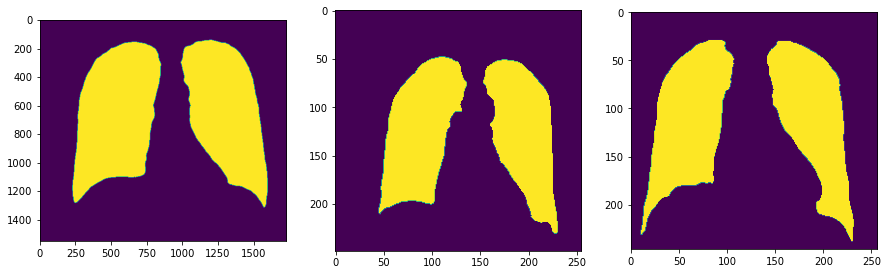

In [38]:
path_masks = 'covid-chestxray-dataset\\annotations\\lungVAE-masks'
files = os.listdir(path_masks)
fig, axs = plt.subplots(ncols=3,figsize=(15,5))
for i in range(3):
    filepath = os.path.join(path_masks, files[i+50])
    axs[i].imshow(plt.imread(filepath))

## Similarity of pictures using SSIM

In [3]:
from skimage.measure import compare_ssim as ssim

In [5]:
#pretty much the same thing as calculating frobenius norms
def calculate_ssim(picture_names,path):
    image_matrices=[]
    shape=Image.open(path+picture_names.iloc[0])
    shape=shape.size
    for name in picture_names:
        image=Image.open(path+name)
        image_matrices.append(np.array(image.resize(shape)))
    for i in range(len(image_matrices)-1):
        print(f'ssim between matrices {i} and {i+1}: {ssim(image_matrices[i],image_matrices[i+1],multichannel=True)}')

### Covid_CT

In [11]:
patient=patients[3] #Specify patient
picture_names=noncovid_meta[noncovid_meta["patient id"]==patient]["image name"]
calculate_ssim(picture_names,path_non_covid)

ssim between matrices 0 and 1: 0.13516006477465364
ssim between matrices 1 and 2: 0.13414702277816232
ssim between matrices 2 and 3: 0.2956824820211645


<ipython-input-5-c9a0b581645c>:10: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  print(f'ssim between matrices {i} and {i+1}: {ssim(image_matrices[i],image_matrices[i+1],multichannel=True)}')


#### there is little simmilarity between those pictures probably because of resizing

## Size of symptoms vs size of picture

Covid_CT dataset isn't prepared for localisation task

Padchest - no data regarding size of symptoms or bounding boxes.

JSRT - all images have the same size.

IQ-OTHNCCD  - no information about size of the symptoms

Covid Chest X-ray dataset - no information about size of the symptoms

### VinDr_CXT

(array([1.807e+03, 3.980e+02, 2.580e+02, 1.310e+02, 6.100e+01, 2.700e+01,
        7.000e+00, 4.000e+00, 1.000e+00, 3.000e+00]),
 array([1.23019059e-04, 3.12622938e-02, 6.24015685e-02, 9.35408432e-02,
        1.24680118e-01, 1.55819393e-01, 1.86958667e-01, 2.18097942e-01,
        2.49237217e-01, 2.80376491e-01, 3.11515766e-01]),
 <BarContainer object of 10 artists>)

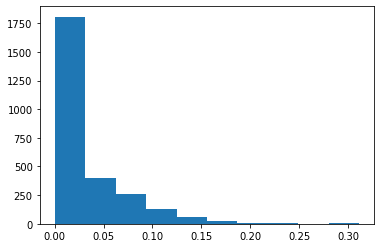

In [144]:
path_name="./Input/"
images=annotations["image_id"]+".jpg"
location=annotations.iloc[:,2:]
pic_size=[]
symptom_size=[]
percentage=[]
for i in range(len(images)):
        if(path.exists(path_name+str(images[i]))):
            image=Image.open(path_name+images[i])
            pic_size.append(image.width*image.height)
            symptom_size.append((location.x_max[i]-location.x_min[i])*(location.y_max[i]-location.y_min[i]))
            percentage.append(symptom_size[-1]/pic_size[-1])
            
plt.hist(percentage)            

## Most common localisation of changes

### VinDr_CXT

Because pictures are of different sizes there is no point comparing localisation of changes. Furthermore lungs do not cover the same percentage of picture, so on one picture point x=0 y=100 could point to spine and on the other to the middle of the right lung.
Teaching models to create masks showing lungs, then deviding them into areas like: middle left lung, right upper lung, just to determine in which region/ regions changes were detected in training set is ludicrous its easier to train model and then analyse it with some XAI techniques!

### JSRT

In [40]:
jsrt_nodules['Location'].value_counts()

r.upper (S2)       16
r.upper (S1)       15
r.upper            13
r.lower (S6)       10
left lung           9
l.upper (S1+2)      8
r.upper (S3)        7
l.upper             7
r.middle (S4)       7
l.lower (S10)       6
r.lower             6
l.upper (S3)        6
l.lower (S6)        6
l.lower             6
r.middle            5
l.upper (S4)        5
r.lower (S9)        3
r.lower (S10)       3
right lung          3
l.lower (S8)        2
r.lower (S8)        2
r.lower (S7)        2
l.upper (S5)        2
l.lower (S6-S8)     1
r.middle (S5)       1
l.lower (S9)        1
r.upper (S2-S3)     1
r.lower (S9-10)     1
Name: Location, dtype: int64

### Padchest

In [45]:
padchest_meta['Localizations'].value_counts()

[]                                                                                                       65523
['loc cardiac']                                                                                           6242
['loc aortic']                                                                                            2777
['loc aortic', 'loc cardiac']                                                                             1483
['loc hilar']                                                                                             1186
                                                                                                         ...  
['loc cervical', 'loc left', 'loc pleural', 'loc superior mediastinum', 'loc mediastinum']                   1
['loc left', 'loc pleural', 'loc hemithorax', 'loc basal', 'loc left lower lobe', 'loc retrocardiac']        1
['loc thymus', 'loc cardiac']                                                                                1
[

#### IQ-OTHNCCD and Covid-19 Chest X-ray
both data sets don't store the information about the localisation of the the changes

## Are pictures always in vertical orientation?

For Covid_Ct, Vin_Dr_CXT, JSRT,IQ-OTHNCCD , Covid-19 Chest X-ray yes.
Padchest and  in some cases - no.

## Are pictures always in the middle of the window?

For Covid_Ct, Vin_Dr_CXT, JSRT,IQ-OTHNCCD,Covid-19 Chest X-ray   yes.

Padchest in some cases - no.

## Quality data

### Do the photos differ in other areas than lungs?

Information included later in artefacts, letters and medical aparature sections.

### Are the images blurred?

* Padchest: No
* JSRT: No
* Covid_CT: No
* VinDr_CXT: No
* IQ-OTHNCCD lung cancer dataset: No
* Covid-19 Chest X-Ray data set: No

(checked manually)

### Artefacts

* Padchest: None
* JSRT: white rectangles on some images
* Covid_CT: random circles and rectangles on some pictures
* VinDR_CXT: jewelry
* IQ-OTHNCCD lung cancer dataset: None
* Covid-19 Chest X-Ray data set: Clips and wires

### Medical aparature present?



* JSRT: None
* Padchest: on some images
* Covid_CT: None
* VinDR_CXT: on some images
* IQ-OTHNCCD lung cancer dataset: None
* Covid-19 Chest X-Ray data set: on some images

### Letters on images

* JSRT: None
* Padchest: Single letters (mostly 'R's) on some images
* Covid_CT: Yes
* VinDR_CXT: Yes
* IQ-OTHNCCD lung cancer dataset: None
* Covid-19 Chest X-Ray data set: On some images mostly R or L

### Just one change annotated (instead of multiple changes)?

* Padchest: multiple labels present for many images, probably all changes mentioned
* JSRT: database only for nodule detection, other changes irrelevant
* Covid_CT: Only Covid cases annotated
* VinDR_CXT: Multiple changes
* IQ-OTHNCCD lung cancer dataset: Only information about presence of the cancer is mentioned
* Covid-19 Chest X-Ray data set: Contains only information about type of the pneumonia

### Personal data

* Padchest: birth date
* JSRT: None
* Covid_CT: None
* VinDR_CXT: None
* IQ-OTHNCCD lung cancer dataset: None
* Covid-19 Chest X-Ray data set: None

### Number of images' channels

In [3]:
import os
from matplotlib import image
import collections

In [4]:
def check_n_channels(directory, threshold):
    shapes = []
    i = 0
    for file in os.listdir(directory):
        img = image.imread(directory+'/'+file)
        shapes.append(img.shape[-1] if img.ndim == 3 else 1)
        i += 1
        if i == threshold: break
    return collections.Counter(shapes)

#### Padchest database

In [24]:
check_n_channels('./padchest/images', 1000)

Counter({1: 1000})

In Padchest database all images from the sample have one channel.

#### JSRT database

In [26]:
check_n_channels('./padchest/images', 247)

Counter({1: 247})

In JSRT database all images have one channel.

#### VinDR_CXT and Covid_Ct databases

All pictures are monochromatic

#### IQ-OTHNCCD lung cancer dataset

In [6]:
path1 = 'The IQ-OTHNCCD lung cancer dataset\\Bengin cases'
path2 = 'The IQ-OTHNCCD lung cancer dataset\\Malignant cases'
path3 = 'The IQ-OTHNCCD lung cancer dataset\\Normal cases'
paths = [path1,path2,path3]
for path in paths:
    print(check_n_channels(path, len(os.listdir(path))))

Counter({3: 120})
Counter({3: 561})
Counter({3: 416})


All pictures have three channels

#### Covid-19 X-ray dataset

In [7]:
path = 'covid-chestxray-dataset\images'
print(check_n_channels(path, len(os.listdir(path))))

Counter({3: 480, 1: 293, 4: 157})


We cam see that in our dataset we have bot 1 and 3 channel images and also 4 channel images which are CMYK type image and four channels are : cyan, magenta, yellow, and black

### Images size

Information available in previous homework

### Differences between training and test subsets

* Padchest: no predefined subsets
* JSRT: no predefined subsets
* Covid_CT: no predefined subsets
* VinDr_CXT: no predefined subsets
* IQ-OTHNCCD lung cancer dataset: no visible change whatsoever
* Covid-19 Chest X-Ray data set: no predefined subsets

### Mutual databases evaluation

On a 1 to 6 scale:

* PadChest: 3.5 - Lots of irrelevant information, inconsistent images
* JSRT: 4 - Maybe too few photos
* Covid CT: 1
* VinDr_CXT: 4
* IQ-OTHNCCD lung cancer dataset: 2.5 no metadata
* Covid-19 Chest X-Ray data set: 2 to many different image sizes, types, views etc.

### Certainty scale

* Padchest: None
* JSRT: None
* Covid_Ct: None
* VinDr_CXT: None
* IQ-OTHNCCD lung cancer dataset: None
* Covid-19 Chest X-Ray data set: None

# Homework 2 pt. 2


In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import numpy as np
import pytesseract
import warnings

In [2]:
path1 = 'The IQ-OTHNCCD lung cancer dataset\\Bengin cases'
path2 = 'The IQ-OTHNCCD lung cancer dataset\\Malignant cases'
path3 = 'The IQ-OTHNCCD lung cancer dataset\\Normal cases'
paths_iq = [path1,path2,path3]
path_x= 'covid-chestxray-dataset\\images'
chestxray_df = pd.read_csv("covid-chestxray-dataset/metadata.csv")

In [4]:
clndat = pd.read_csv('./jsrt/Clinical_Information/CLNDAT_EN.txt', sep='\t', names = ['ImageID', 'Nodule_size', 'Degree_of_subtlety', 'Age','Sex','X','Y','Type','Location', 'Diagnosis'], index_col=False)

# Dependencies
## Correlation between shape of the image and the occurrence of the illness

The IQ-OTHNCCD lung cancer dataset

In [2]:
def get_shapes(path):
    # path - path to the folders that contain photo
    shapes = []
    for file in os.listdir(path):
        filepath = os.path.join(path, file)
        shape = plt.imread(filepath).shape
        shapes.append(' '.join([str(i) for i in shape]))
    return shapes
from sklearn.feature_selection import mutual_info_regression
def custom_mi_reg(a, b):
    a = a.reshape(-1, 1)
    b = b.reshape(-1, 1)
    return  mutual_info_regression(a, b)[0] # should return a float value
def mutual_info_map(df,labels_list):
    info = pd.get_dummies(df[labels_list]).corr(method = custom_mi_reg)
    sns.set(rc = {'figure.figsize':(15,15)})
    sns.heatmap(info)
    plt.show()
def corr_map(df,labels_list):
    corr = pd.get_dummies(df[labels_list]).corr()
    sns.set(rc = {'figure.figsize':(15,15)})
    sns.heatmap(corr)
    plt.show()



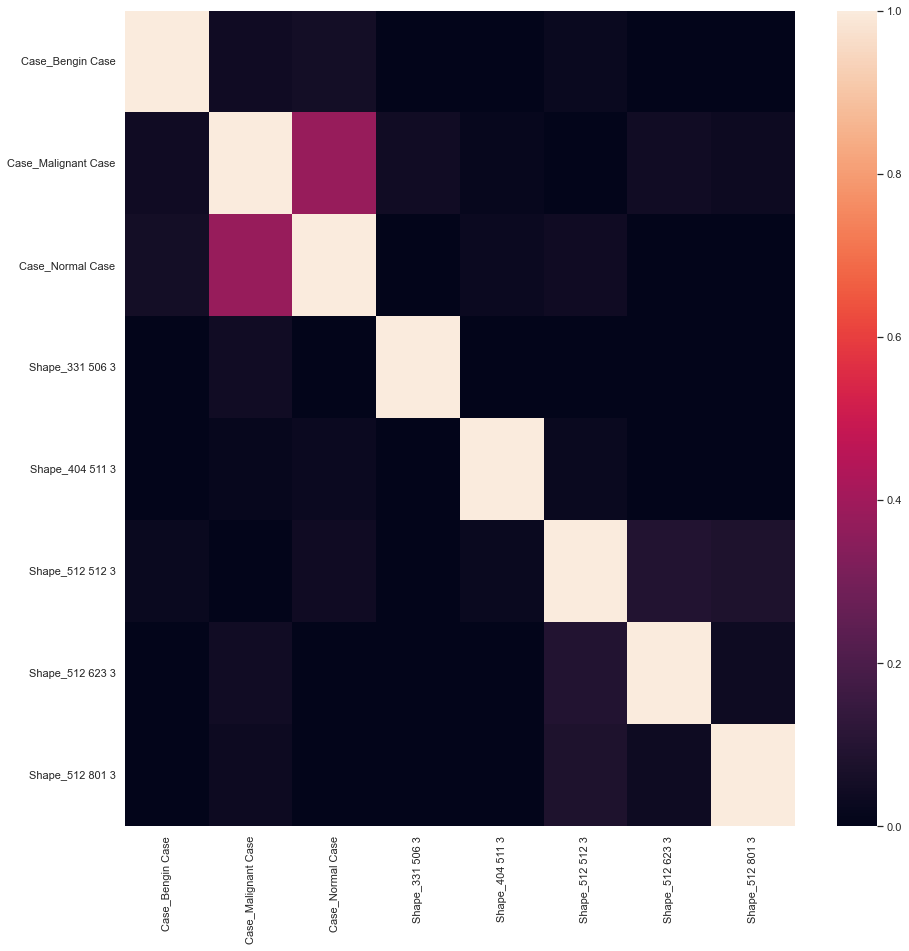

In [14]:
warnings.filterwarnings("ignore")
shapes1 = get_shapes(path1)
shapes2 = get_shapes(path2)
shapes3 = get_shapes(path3)
cases = ["Bengin Case"]*len(shapes1) + ["Malignant Case"]*len(shapes2) + ["Normal Case"]*len(shapes3)
shapes  = shapes1 + shapes2 + shapes3
cancer_df = pd.DataFrame({"Case":cases , "Shape":shapes})
mutual_info_map(cancer_df,['Case','Shape'])

We can see that there is no dependence between tumor type and the shape

Covid-19 Chest X-Ray data set

In [15]:
def get_shape(filepath):
    # path - path to the image
    shape = plt.imread(os.path.join(path_x,filepath)).shape
    return ' '.join([str(i) for i in shape])
def is_in():
    res = []
    for i in chestxray_df['filename']:
        if i in files:
           res.append(True)
        else:
            res.append(False)
    return res
files = os.listdir(path_x)
files_df = chestxray_df[is_in()]
## working on subset to speed up the calculations
files_df_sub = files_df.head(100).copy()
files_df_sub['shape'] = files_df_sub.filename.apply(get_shape)

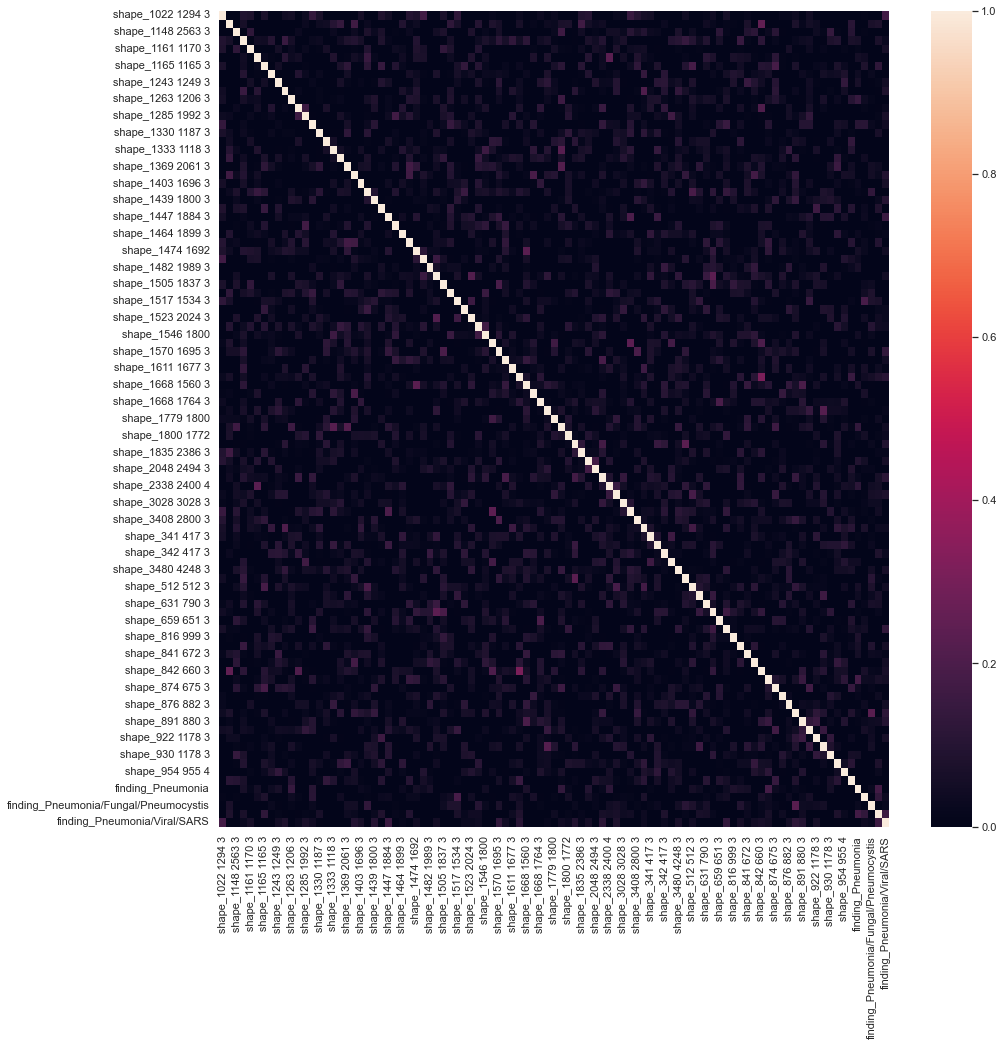

In [16]:
mutual_info_map(files_df_sub,['shape','finding'])

We have to many different shapes in our dataset to see any dependency.

JSRT - all images have the same shape

Padchest - too many unique illnesses to calculate

##  Dependency between size and the location of the lesion
* IQ-OTH/NCCD - no information about sizes an the locations of the lesions
* Covid-19 Chest X-Ray data set - no information about sizes an the locations of the lesions
* Covid-CT - no information about sizes an the locations of the lesions
* VinDr-CXT - location is dependent on lesion and size on severity of the case so there is no clear correlation
* Padchest - no information about sizes of lesions

### JSRT

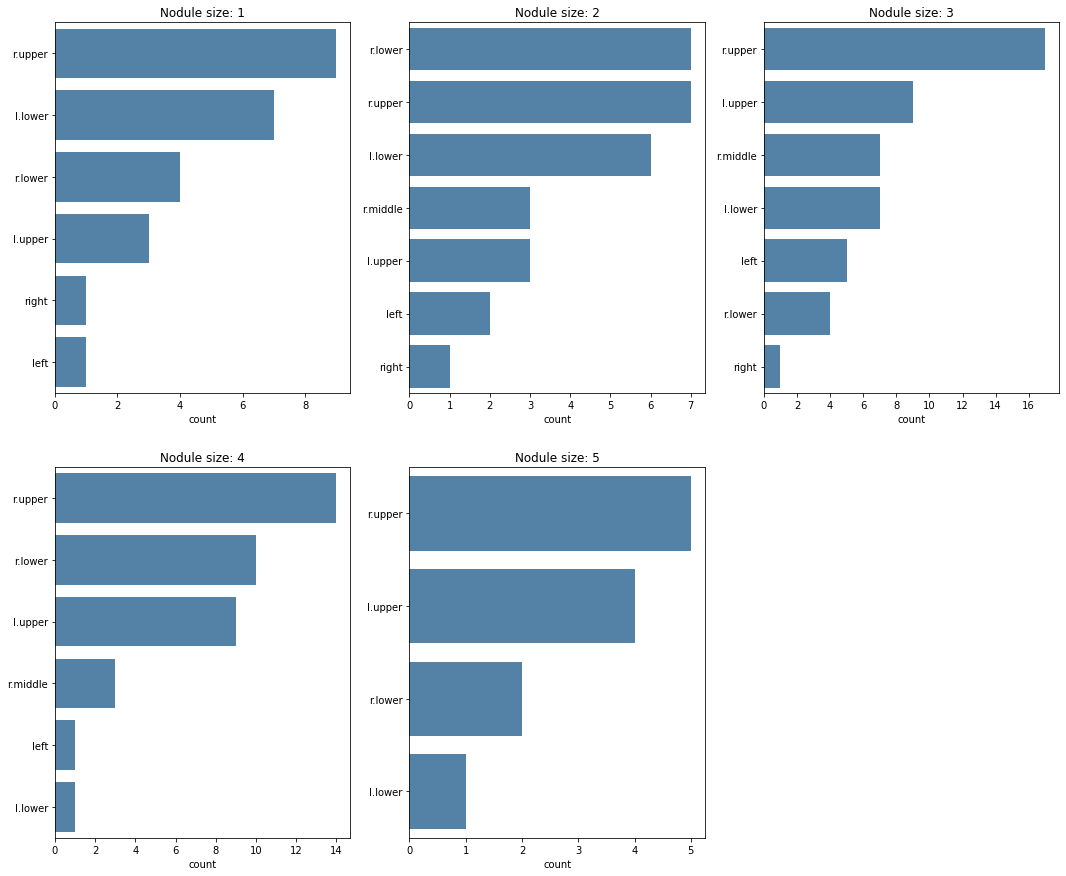

In [6]:
clndat['Location_modified'] = clndat.Location.str.split(' ').str[0]
fig, axes = plt.subplots(2, 3, figsize=(18, 15))
sns.barplot(y = clndat[clndat['Nodule_size'] == 1].Location_modified.value_counts().index, x = clndat[clndat['Nodule_size'] == 1].Location_modified.value_counts(), color = 'steelblue', ax=axes[0,0])
sns.barplot(y = clndat[clndat['Nodule_size'] == 2].Location_modified.value_counts().index, x = clndat[clndat['Nodule_size'] == 2].Location_modified.value_counts(), color = 'steelblue', ax=axes[0,1])
sns.barplot(y = clndat[clndat['Nodule_size'] == 3].Location_modified.value_counts().index, x = clndat[clndat['Nodule_size'] == 3].Location_modified.value_counts(), color = 'steelblue', ax=axes[0,2])
sns.barplot(y = clndat[clndat['Nodule_size'] == 4].Location_modified.value_counts().index, x = clndat[clndat['Nodule_size'] == 4].Location_modified.value_counts(), color = 'steelblue', ax=axes[1,0])
sns.barplot(y = clndat[clndat['Nodule_size'] == 5].Location_modified.value_counts().index, x = clndat[clndat['Nodule_size'] == 5].Location_modified.value_counts(), color = 'steelblue', ax=axes[1,1])
axes[0,0].set(title = "Nodule size: 1", xlabel = 'count')
axes[0,1].set(title = "Nodule size: 2", xlabel = 'count')
axes[0,2].set(title = "Nodule size: 3", xlabel = 'count')
axes[1,0].set(title = "Nodule size: 4", xlabel = 'count')
axes[1,1].set(title = "Nodule size: 5", xlabel = 'count')
axes[1,2].axis('off')
plt.show()

##  Dependency between classes

IQ-OTH/NCCD, Covid_CT and Covid-19 Chest X-Ray data set are both not multi-label class data sets

VinDR_CXT - Nodule/Mass and Lung tumor have highest dependencies(code and calculation in HW1)

JSRT - only one class

### Padchest

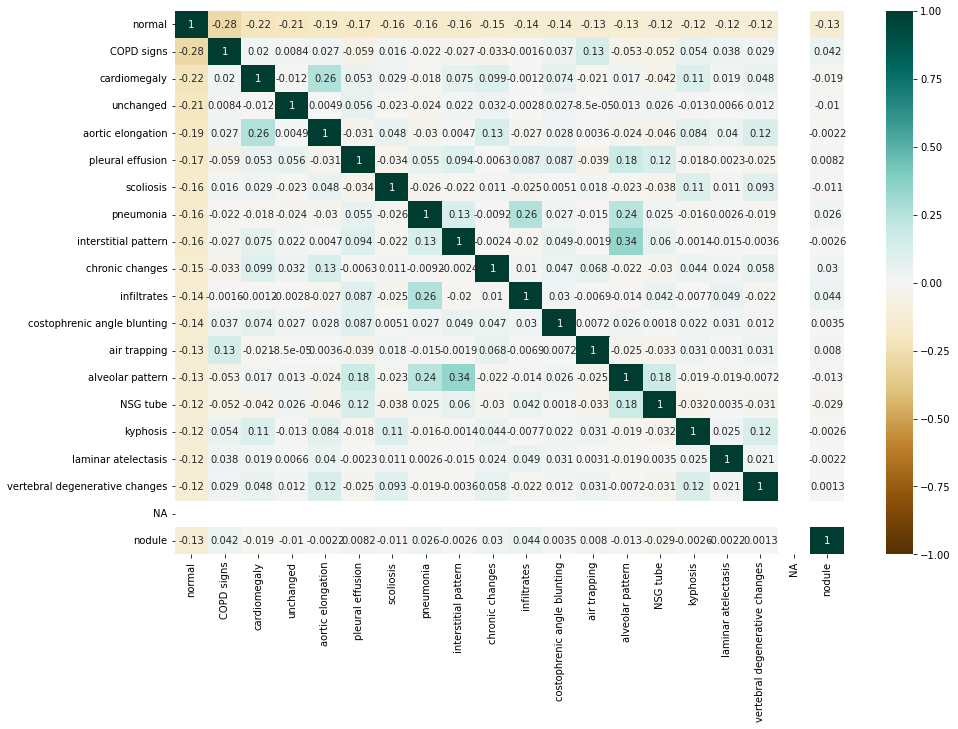

In [10]:
metadata = pd.read_csv('./padchest_dataset/PADCHEST_chest_x_ray_images_labels_160K_01.02.19.csv', low_memory=False)
metadata['Labels'] = metadata['Labels'].astype('str')
metadata['Labels'].fillna('[""]', axis = 0,inplace = True)
labels = metadata['Labels'].tolist()
labels
for i,e in enumerate(labels):
    e = e.replace('\"', '')
    e = e.replace('\'', '')
    e = e.replace('[', '')
    labels[i] = e.replace(']', '')
labels = [y for x in labels for y in x.split(',')]
for i,e in enumerate(labels):
    labels[i] = e.strip()
labels = [[x,labels.count(x)] for x in set(labels)]
labels = pd.DataFrame(labels, columns=['label', 'number of occurences'])
labels.sort_values(by = 'number of occurences', inplace = True, ignore_index = True, ascending = False)
labels = labels.head(20)
labels.iloc[18,0] = 'NA'
labels_list = labels['label'].tolist()
for label in labels_list:
    metadata[label] = metadata.apply(lambda x: 1 if label in str(x['Labels']) else 0, axis = 1)
    
plt.figure(figsize=(15, 10))
heatmap = sns.heatmap(metadata[labels_list].corr(), annot=True, vmin=-1, vmax=1, cmap="BrBG")
plt.show()

## Dependency between type of lesion and likeliness of location.
* IQ-OTH/NCCD - no information about sizes an the locations of the lesions
* Covid-19 Chest X-Ray data set - no information about sizes an the locations of the lesions
* JSRT - one lesion type

### Padchest

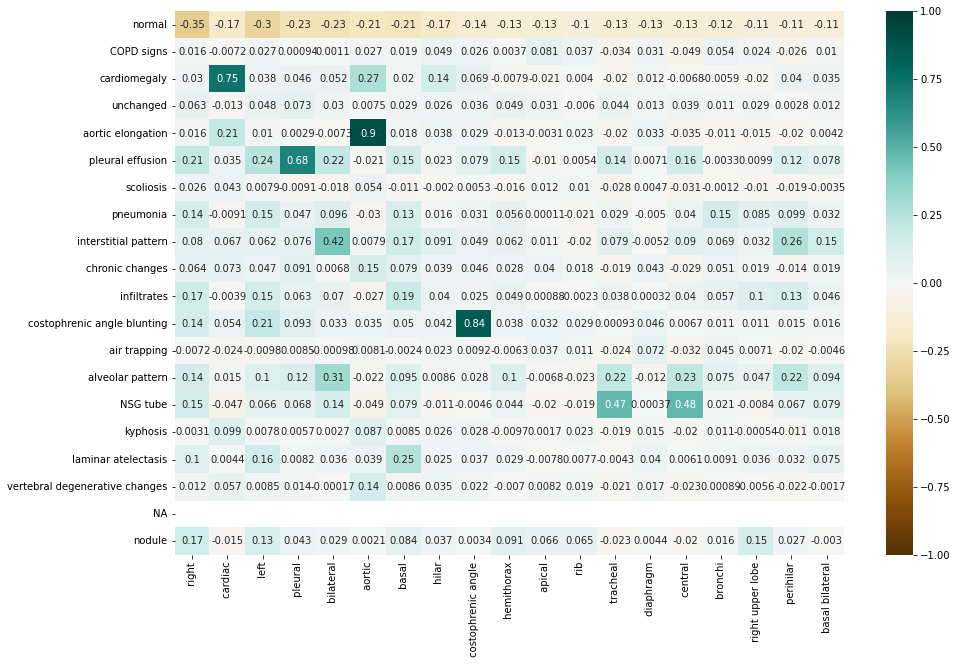

In [12]:
metadata['Localizations'] = metadata['Localizations'].astype('str')
metadata['Localizations'].fillna('[""]', axis = 0,inplace = True)
localizations = metadata['Localizations'].tolist()
for i,e in enumerate(localizations):
    e = e.replace('\"', '')
    e = e.replace('\'', '')
    e = e.replace('[', '')
    localizations[i] = e.replace(']', '')
localizations = [y for x in localizations for y in x.split(',')]
for i,e in enumerate(localizations):
    e = e.strip()
    localizations[i] = e.replace('loc', '')
localizations = [[x,localizations.count(x)] for x in set(localizations)]
localizations = pd.DataFrame(localizations, columns=['localization', 'number of occurences'])
localizations.sort_values(by = 'number of occurences', inplace = True, ignore_index = True, ascending = False)
localizations = localizations.head(20)
localizations.iloc[0,0] = 'NA'
localizations_list = localizations['localization'].tolist()
for localization in localizations_list:
    metadata[localization] = metadata.apply(lambda x: 1 if localization in str(x['Localizations']) else 0, axis = 1)
    
plt.figure(figsize=(15, 10))
heatmap = sns.heatmap(metadata[labels_list + localizations_list].corr().iloc[:20,-19:], annot=True, vmin=-1, vmax=1, cmap="BrBG")
plt.show()

## Correlation between labels and projection type.
IQ-OTH/NCCD - no metadata


VinDr-CXT and Covid_CT have no specified different projection types

JSRT - no labels

Covid-19 Chest X-Ray data set

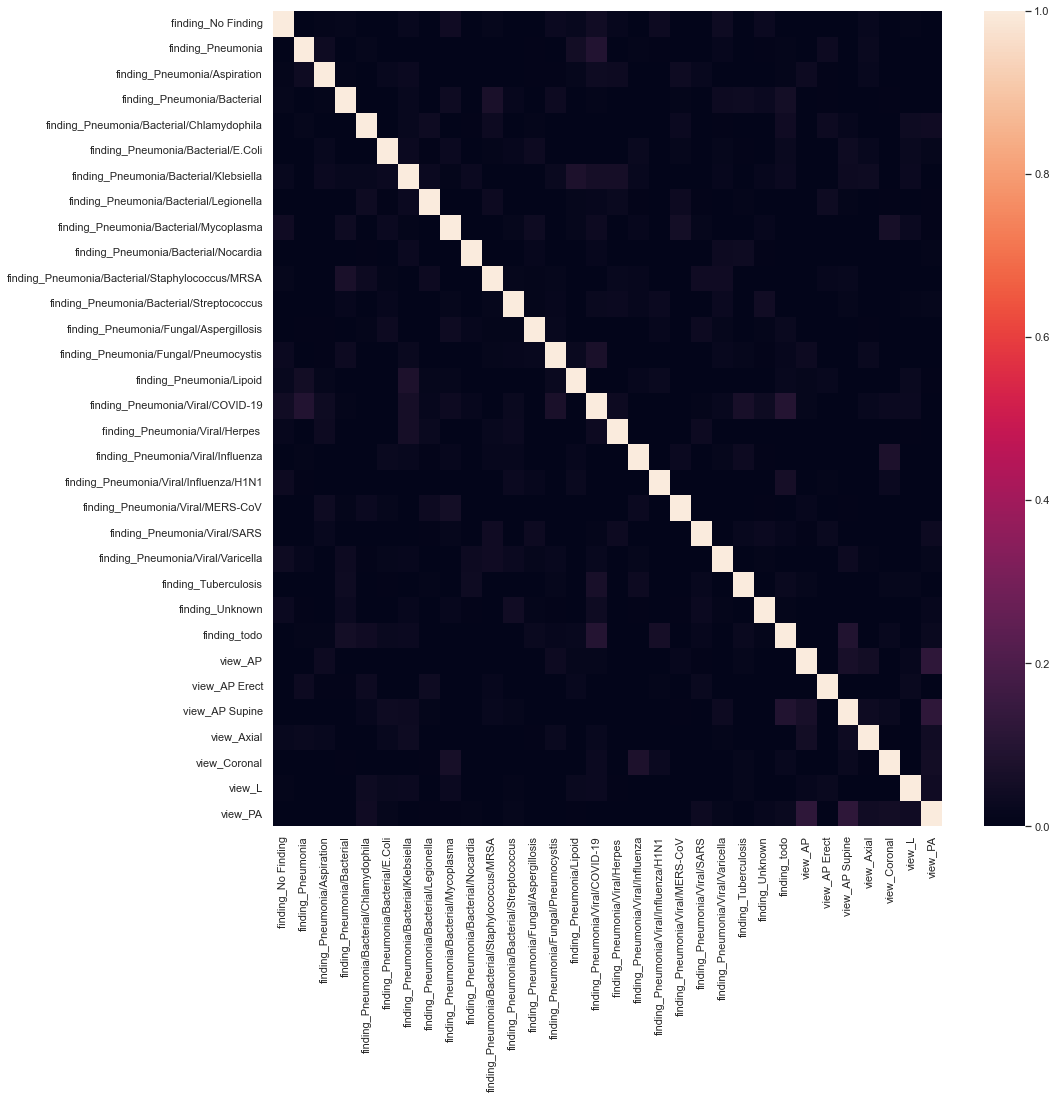

In [17]:
mutual_info_map(chestxray_df,['finding','view'])

We can see that there is no dependency between labels and projection type.

Padchest dataset

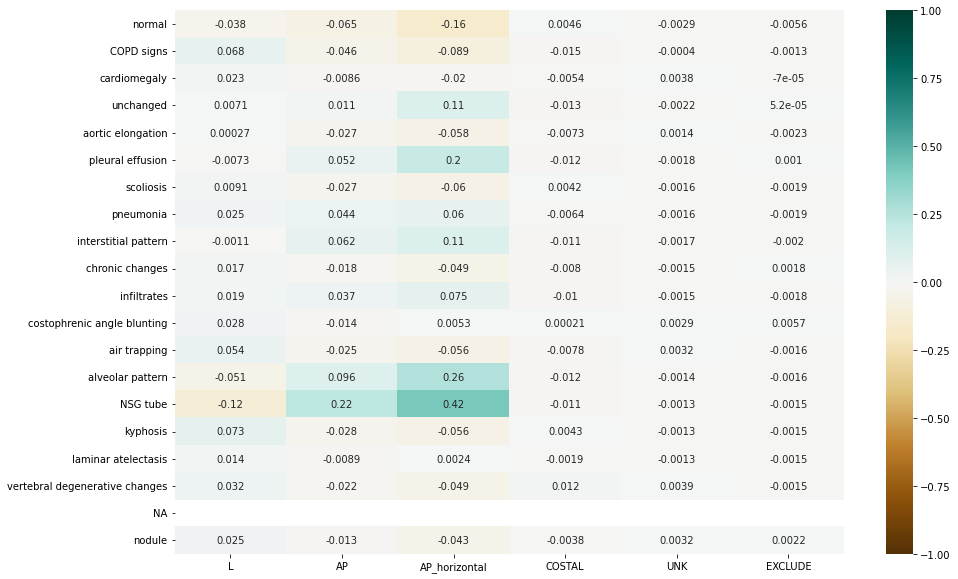

In [13]:
projections_list = metadata['Projection'].unique().tolist()
for projection in projections_list:
    metadata[projection] = metadata.apply(lambda x: 1 if projection == x['Projection'] else 0, axis = 1)
    
plt.figure(figsize=(15, 10))
heatmap = sns.heatmap(metadata[labels_list + projections_list].corr('pearson').iloc[:20 , -6:], annot=True, vmin=-1, vmax=1, cmap="BrBG")
plt.show()

## Correlation between class and occurence of the text on the image.

In [39]:
def findtext(path,tesseract_path):
    text = []
    img = cv2.imread(path)
    pytesseract.pytesseract.tesseract_cmd = tesseract_path
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, thresh1 = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)
    rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (18, 18))
    dilation = cv2.dilate(thresh1, rect_kernel, iterations = 1)
    contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL,
                                           cv2.CHAIN_APPROX_NONE)
    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        rect = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cropped = img[y:y + h, x:x + w]
        text.append(pytesseract.image_to_string(cropped))
    return text
def any_text(path_file,path_dir,tesseract_path):
    path = os.path.join(path_dir,path_file)
    text = findtext(path,tesseract_path)
    if len(text[0]) > 0:
        return 1
    else:
        return 0

Covid-19 Chest X-Ray data set

Text found:  ['']


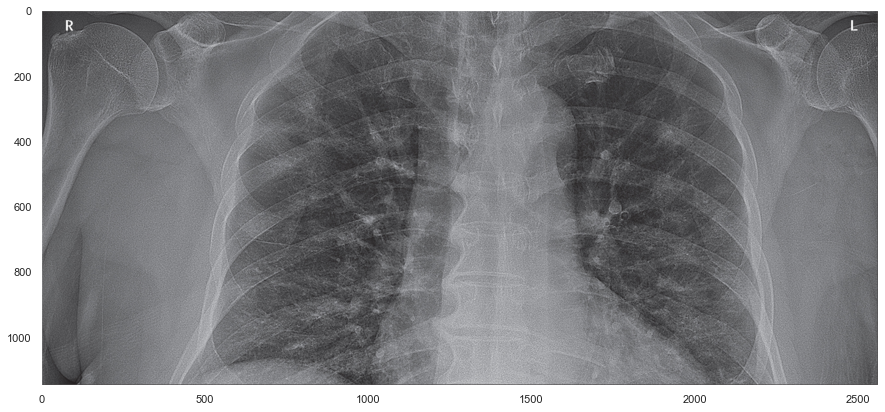

In [46]:
tesseract1 = 'C:\Program Files\Tesseract-OCR\\tesseract.exe'
print('Text found: ', findtext('covid-chestxray-dataset/images/1-s2.0-S0140673620303706-fx1_lrg.jpg',tesseract1))
plt.imshow(plt.imread('covid-chestxray-dataset/images/1-s2.0-S0140673620303706-fx1_lrg.jpg'))
plt.grid(False)
plt.show()

We can see that our OCR is not finding text on the images of X-ray scans.

## Does AP indicate illness and PA normal case?
IQ-OTH/NCCD - no metadata

JSRT - no data

Padchest - from the correlation matrix a few cells above, we can see that AP might slightly indicate illness; no data on PA projections

Covid-19 Chest X-Ray data set

In [47]:
chest_cut_df = chestxray_df[(chestxray_df['view']=='PA') | (chestxray_df['view']=='AP')]

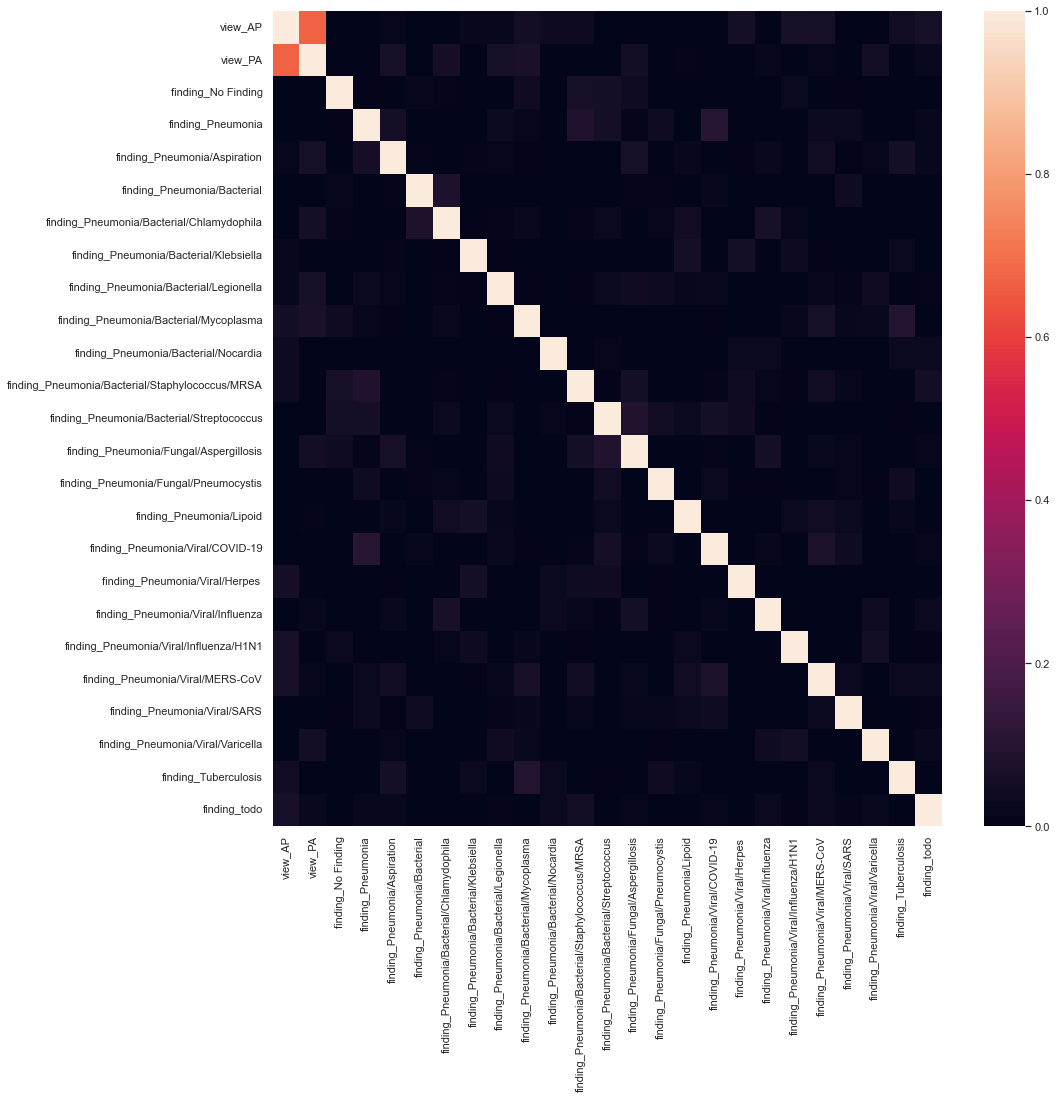

In [48]:
mutual_info_map(chest_cut_df,['view','finding'])

There is no dependency between PA or AP view and findings.

## Is there an ilness/lesion which occurs only in specific position
* IQ-OTH/NCCD - no metadata.
* Covid-19 Chest X-Ray data set - as we can see from the mutual information matrix above there is no speceific view where one finding occurs most often.
* VinDr-CXT - no
* Covid_Ct - only one ilness in dataset
* Padchest - no
* JSRT - no data

# Dependency between age an the ilness
* IQ-OTH/NCCD, VinDr_CXT - no metadata.
* Covid_CT - there is only one ilness in dataset
* JSRT - one illness

Covid-19 Chest X-Ray data set

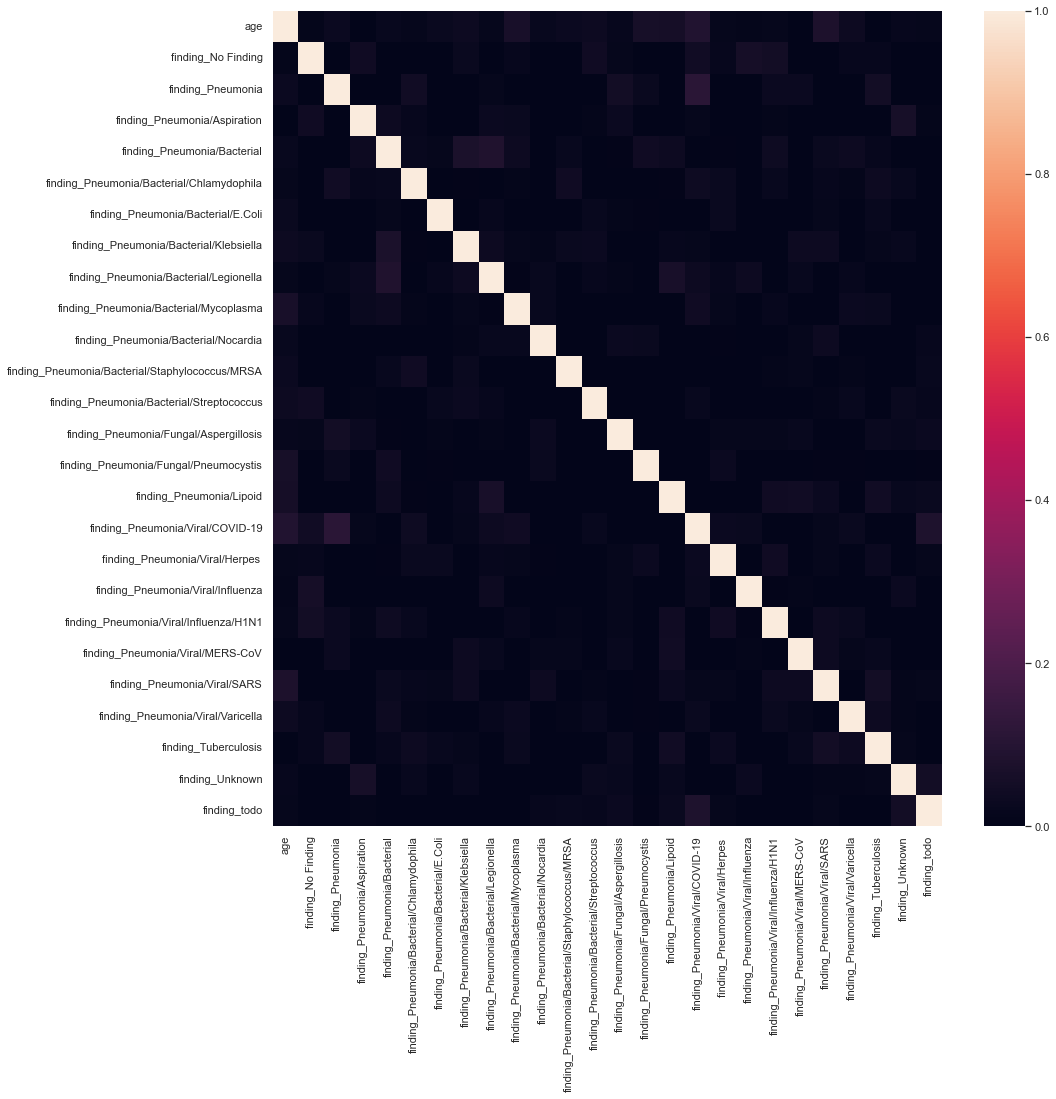

In [49]:
mutual_info_map(chestxray_df,['age','finding'])

No strong dependency